<a href="https://colab.research.google.com/github/aflores/colab-notebooks/blob/master/covid01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Covid-19 data

Just playing with Pandas using the data provided by:

 https://covidtracking.com/
 
## Things to try
 
 - Read data directly from the project's URL
 - Plot data to observe trends
 

## Journal

### 20MAR

  Initial setup.
  I got HTTP 403 when attempting to retrieve the date via URL but using the browser worked ok.
  So I saved the day's data to get going
  
 
### 21MAR

  Continue to have issues with HTTP retrieval (added comment to a similar Github issue)
  Created a function to plot the daily trend of positive, negavite, pending(testing) and deaths
  
  Plotting is not working as I expected:
  - Using 'date' in the x-axis interprets the axis as a large integer
  - Using 'dateChecked', shows the data in descending order
  :-o
  
  
 ### 22MAR
 
   On the plotting issues
   - type 'scatter' requires an numeric x-axis so by using dateChecked the plot is not 'sorted'
  
  
  



In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
data_url = "https://covidtracking.com/api/states/daily"
#data_url = "https://covid.cape.io/states/daily" # per webmasterkai github  - fixed in issue 7
#data_file = "/Users/aflores/projects/ml/covid-19/data/states/daily-latest.json"
# !ls /Users/aflores/projects/ml/covid-19/data/states
# !ln -sf

In [33]:
#daily = pd.read_json(data_file, convert_dates=True)
daily = pd.read_json(data_url)

In [34]:
# show the columns data type
#print(daily.dtypes)

In [35]:
# upon reading the data, the date column looks like a number
# but I rather use it as a string so we can show it in the x-axis
daily = daily.astype({"date": str})
#print(daily.dtypes)

In [36]:
def plot_state (state='FL', df=daily, hide_pending=False, hide_negative=False, hide_positive=False, hide_death=False):
    
    """ Plot daily trends for a single state



    """
    
    daily_tmp = df[daily['state'] == state]
    daily_tmp = daily_tmp.sort_values(by=['date'])
    
    x_axis = 'date' # date or dateChecked
    plot_kind = 'line' # type of plot
 
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('count')
    
    
    if (hide_positive == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='positive',color='red')
    
    if (hide_negative == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='negative',color='green')
    
    if (hide_pending == False):
        daily_tmp.plot(kind=plot_kind ,x=x_axis , ax=ax1,y='pending',color='blue')
    
    # this will be shown on the y-axis on the right side
    if (hide_death == False):
        ax2 = ax1.twinx()
        ax2.set_ylabel('deaths')
        #ax2.grid(linestyle='dotted')
        daily_tmp.plot(kind=plot_kind ,x=x_axis, ax=ax2, y='death',color='black', legend=False)
    
    plt.title(state)
    #plt.setp(ax1.get_xticklabels(),rotation='90')
    
    ax1.grid(linestyle='--')
    
    fig.set_size_inches(10,8)
    fig.tight_layout() 
    
    plt.show()

# test the function    
#plot_state_dual_y(state='NY', hide_pending=True)

In [37]:
def state_pct_change(df_full, state, num_days, col_name):
  """ Percent change over 'num_days' number of days

  """

  df = df_full[df_full['state']== state].head(num_days).sort_values('date',ascending=False)
  row_count = len(df.index)
  ref_value = df.iloc[row_count-1][col_name]
  current_value = df.iloc[0][col_name]
  pct =  (current_value - ref_value)/ref_value
  
  return (col_name, num_days, pct, current_value)

# varx = state_pct_change(daily,'FL',5,'positive')
# print('The current value for "{0[0]}" is "{0[3]}" representing a {0[2]:3.1%} change over {0[1]} days.'.format(varx))

In FL, the current value for "positive" is: 677,660.0 representing a  6% change over 15 days.
In FL, the current value for "death" is: 13,387.0 representing a 12% change over 15 days.
In NY, the current value for "positive" is: 448,052.0 representing a  2% change over 15 days.
In NY, the current value for "death" is: 25,423.0 representing a  0% change over 15 days.
In CA, the current value for "positive" is: 769,831.0 representing a  7% change over 15 days.
In CA, the current value for "death" is: 14,812.0 representing a 10% change over 15 days.
In WA, the current value for "positive" is: 81,602.0 representing a  8% change over 15 days.
In WA, the current value for "death" is: 2,037.0 representing a  5% change over 15 days.
In IL, the current value for "positive" is: 272,525.0 representing a 10% change over 15 days.
In IL, the current value for "death" is: 8,647.0 representing a  3% change over 15 days.
In LA, the current value for "positive" is: 161,322.0 representing a  6% change ove

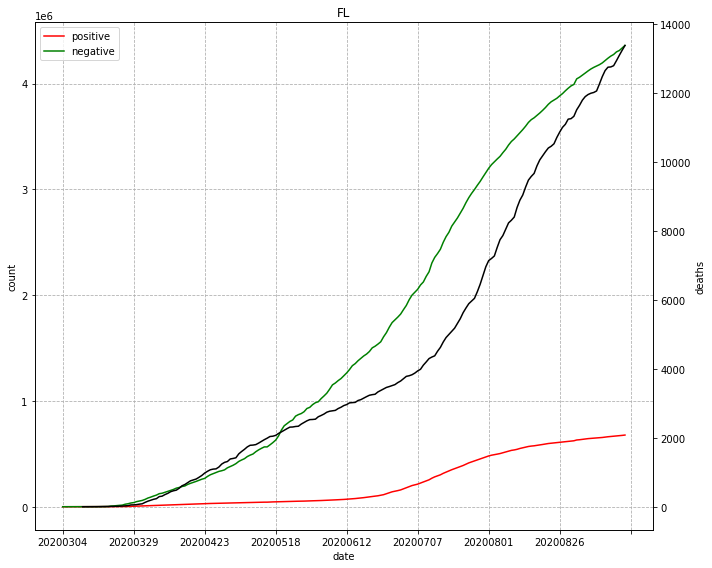

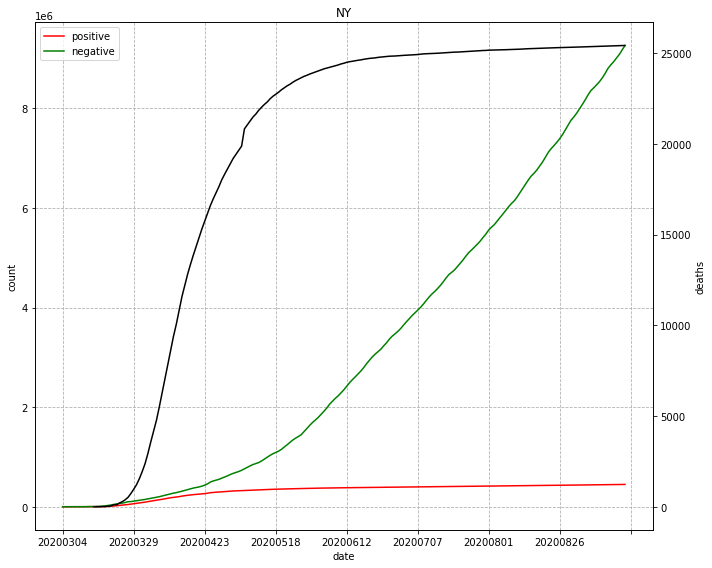

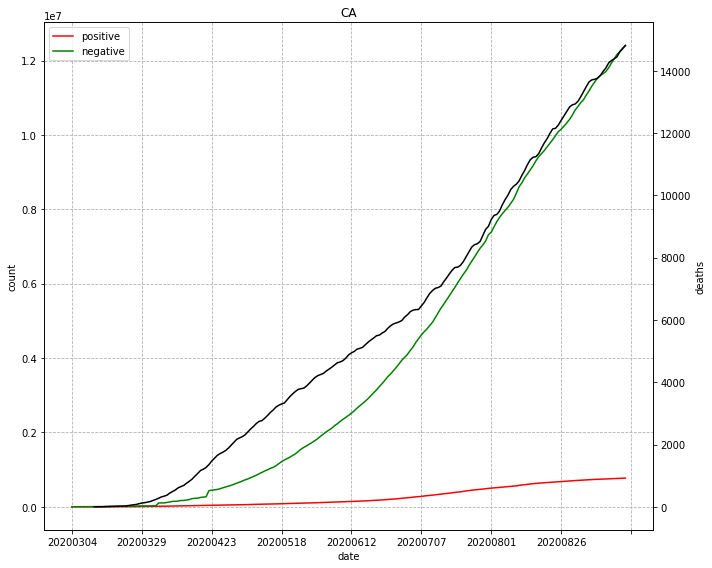

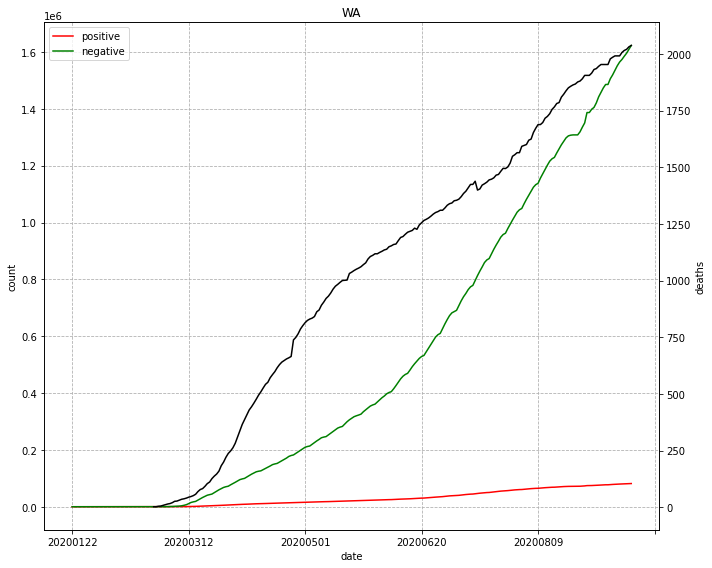

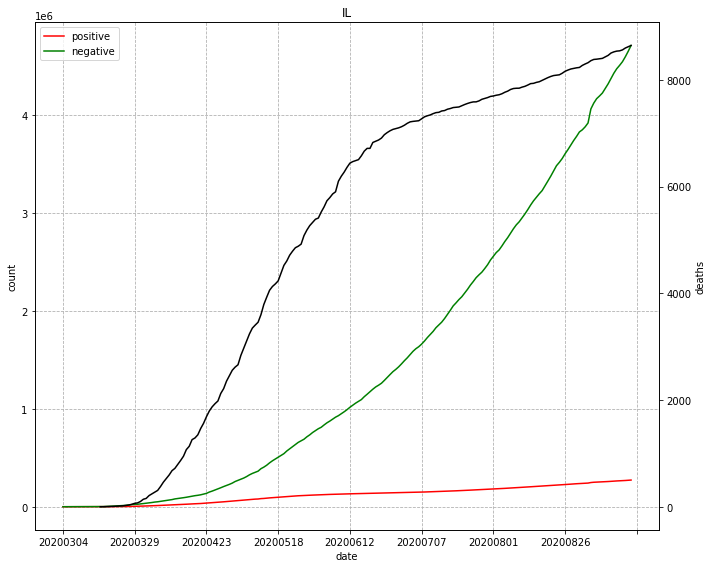

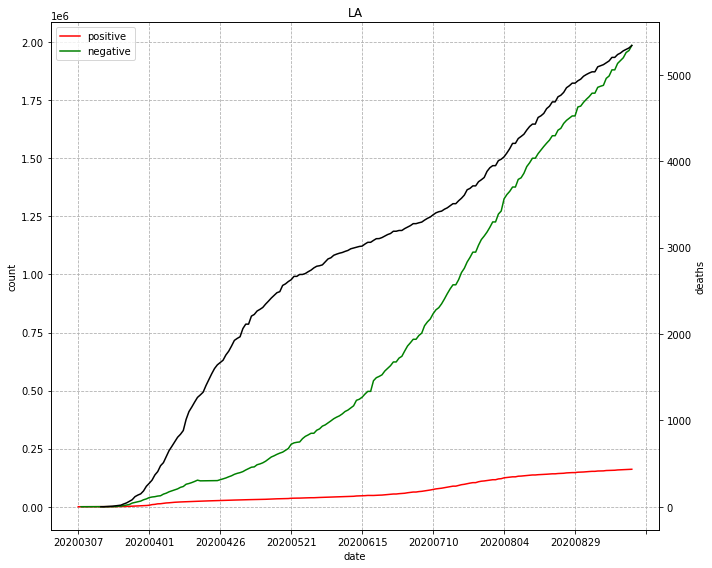

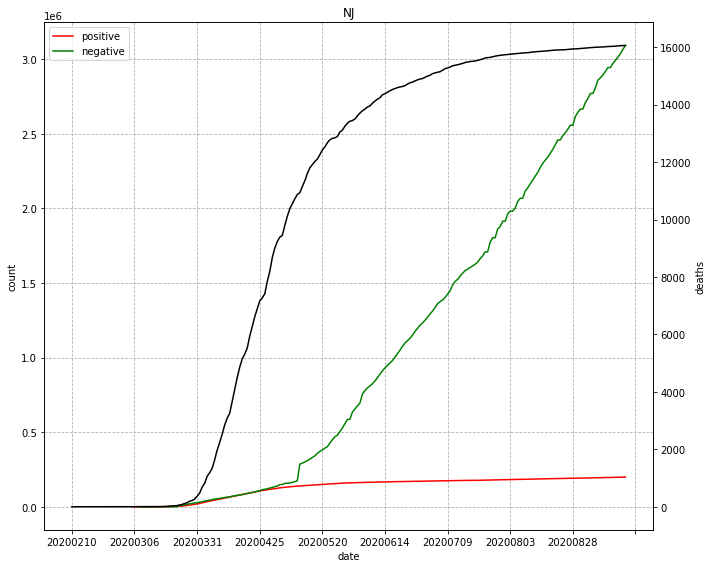

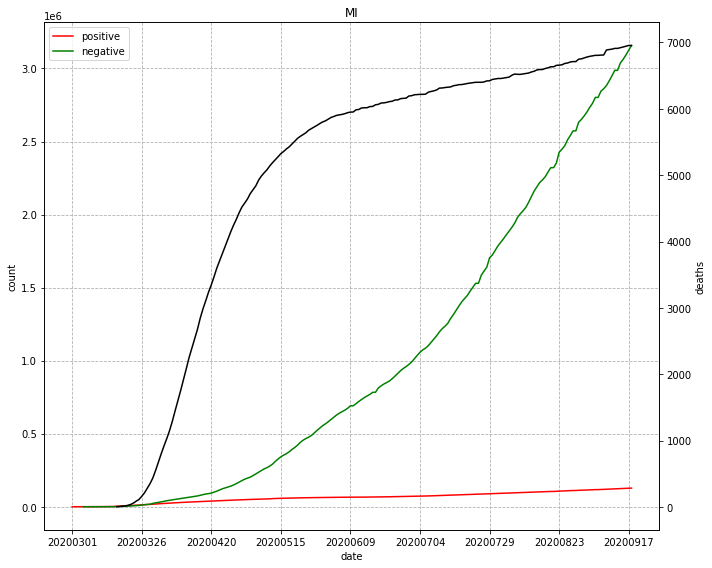

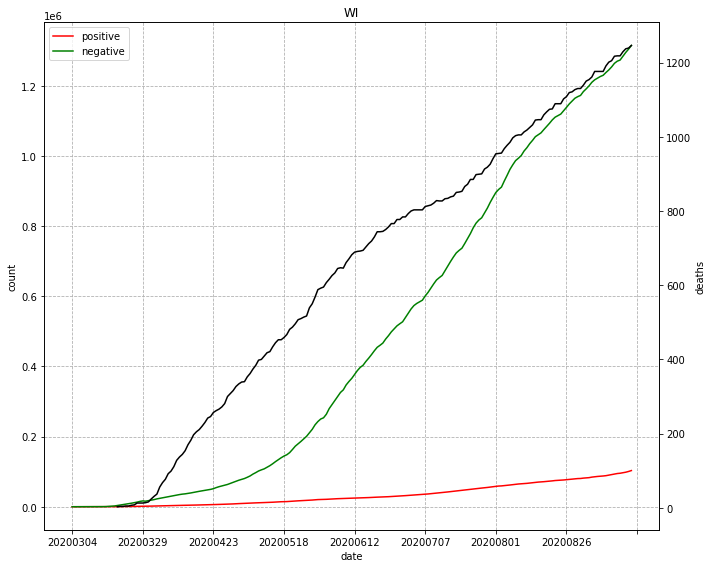

In [38]:
fmt_str = 'In {1}, the current value for "{0[0]}" is: {0[3]:,} representing a {0[2]:3.0%} change over {0[1]:d} days.'

states = ('FL','NY','CA','WA', 'IL','LA','NJ','MI','WI')
for st in states:
    print(fmt_str.format(state_pct_change(daily,st,15,'positive'),st))
    print(fmt_str.format(state_pct_change(daily,st,15,'death'),st))
for st in states:    
    plot_state(st,hide_pending=True)

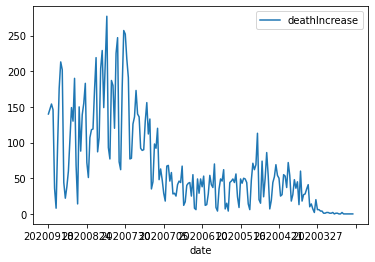

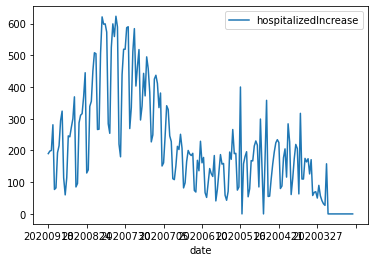

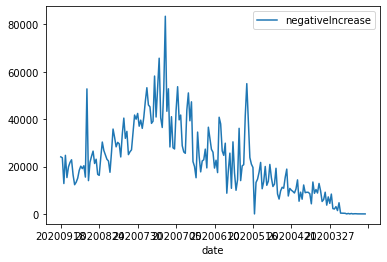

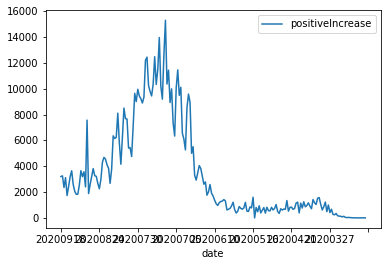

In [39]:
daily_increase = daily[['state','date','deathIncrease','hospitalizedIncrease','negativeIncrease','positiveIncrease']]
daily_increase = daily_increase[(daily_increase['state'] == 'FL') & (daily_increase['date'] > '2020-09-15') ]

daily_increase.plot(x='date', y=['deathIncrease'])
daily_increase.plot(x='date', y=['hospitalizedIncrease'])
daily_increase.plot(x='date', y=['negativeIncrease'])
daily_increase.plot(x='date', y=['positiveIncrease'])

In [41]:
daily_increase.head(200) 

,state,date,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease
10,FL,20200918,140,190,24084,3204
66,FL,20200917,147,198,23695,3255
122,FL,20200916,154,200,12821,2355
178,FL,20200915,146,281,24723,3116
234,FL,20200914,36,77,15342,1736
...,...,...,...,...,...,...
10838,FL,20200308,0,0,18,3
10889,FL,20200307,0,0,45,5
10938,FL,20200306,0,0,24,0
10972,FL,20200305,0,0,7,7
